Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# LGBM Baseline

* Using default LGBM settings, the performance serves as the baseline result to compare with later param tuning performance
* The performance is evaluated through cross validation

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
# tqdm._instances.clear()  # run this when tqdm shows multiple bars in your notebook
from matplotlib import pylab as plt
from matplotlib.offsetbox import AnchoredText

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

In [2]:
df = pd.read_csv('../crystal_ball/data_collector/structured_data/leaf.csv')
print(df.shape)

df.head()

(340, 16)


,species,specimen_number,eccentricity,aspect_ratio,elongation,solidity,stochastic_convexity,isoperimetric_factor,maximal_indentation_depth,lobedness,average_intensity,average_contrast,smoothness,third_moment,uniformity,entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [3]:
def plot_performance_lst(performance_lst, y_label, title):
    plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.set_ylim([0, 1]) # set y-axis range
    
    x = [i+1 for i in range(len(performance_lst))]
    y = performance_lst
    
    ax.plot(x, y, color='g')
    
    # anchor text to show text in the plot
    anchored_text = AnchoredText(f'Average {y_label} is {round(np.mean(performance_lst), 4)}', loc=3, prop={'size': 12})  # the location code: https://matplotlib.org/3.1.0/api/offsetbox_api.html
    ax.add_artist(anchored_text)  
    
    # annotate y_value along the line
    for i,j in zip(x,y):
        ax.annotate(str(round(j, 4)),xy=(i,j))  
    
    plt.xlabel('epoch #')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.40it/s]


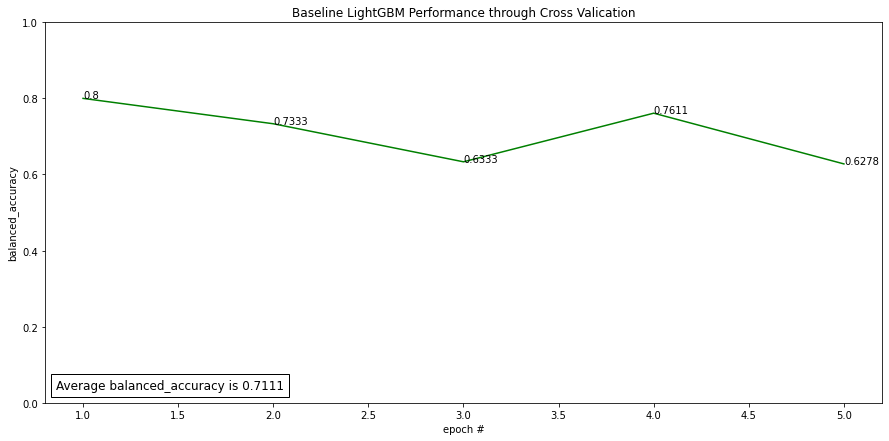

In [4]:
y = df['species']
X = df.drop('species', axis=1)

# baseline performance through cross validation
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)  # small dataset, only use 5 folds
lgbm = lgb.LGBMClassifier(objective='multiclass', random_state=10)
metrics_lst = []

for train_idx, val_idx in tqdm(folds.split(X, y), total=folds.get_n_splits()):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(X_train, y_train)
    y_pred = lgbm.predict(X_val)
    
    cv_balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
    metrics_lst.append(cv_balanced_accuracy)
    
plot_performance_lst(metrics_lst, 'balanced_accuracy', 'Baseline LightGBM Performance through Cross Valication')